In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Загружаем датасет

In [40]:
df = pd.read_csv('data.csv')
df

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
0,18,2,2,2,2,1,2,1,2,2,...,1,1,2,2,2,1,2,211,1,50
1,6,2,2,2,1,2,2,1,2,1,...,2,1,2,2,2,2,1,149,1,40
2,27,1,2,2,1,2,1,2,1,2,...,1,2,1,1,2,1,2,168,1,28
3,29,1,1,2,2,2,1,2,1,1,...,1,2,1,2,2,1,1,230,1,37
4,6,1,2,1,1,1,2,1,2,1,...,2,1,2,2,2,0,1,389,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11238,1,2,2,2,1,1,2,1,2,1,...,2,1,2,2,2,2,1,243,1,24
11239,10,2,2,1,1,1,2,1,1,1,...,2,1,2,1,2,2,1,197,1,39
11240,6,1,2,2,1,1,2,1,2,1,...,2,1,2,2,2,2,1,447,2,33
11241,12,2,2,1,1,1,1,1,1,1,...,1,2,2,2,2,2,1,167,1,24


In [41]:
df.describe()

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
count,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,...,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,11243.000000,1.124300e+04,11243.000000,11243.000000
mean,13.299653,1.385751,1.784844,1.827804,1.174242,1.422307,1.628391,1.302944,1.412612,1.456106,...,1.667882,1.257582,1.807614,1.688695,1.845860,1.606955,1.414925,1.195542e+05,1.429956,34.014231
std,8.508833,0.489890,0.415898,0.382250,0.386075,0.498074,0.486375,0.463982,0.496285,0.505537,...,0.477931,0.449954,0.400239,0.471613,0.370342,0.495859,0.498831,1.262668e+07,0.504348,15.015611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000e+00,0.000000,0.000000
25%,7.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.040000e+02,1.000000,23.000000
50%,12.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.570000e+02,1.000000,30.000000
75%,18.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.410000e+02,2.000000,43.000000
max,40.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.338845e+09,3.000000,509.000000


In [42]:
df.shape

(11243, 44)

# Смотрим кол-во пропущенных значений

In [43]:
(df.isna()).sum()

score     0
Q1        0
Q2        0
Q3        0
Q4        0
Q5        0
Q6        0
Q7        0
Q8        0
Q9        0
Q10       0
Q11       0
Q12       0
Q13       0
Q14       0
Q15       0
Q16       0
Q17       0
Q18       0
Q19       0
Q20       0
Q21       0
Q22       0
Q23       0
Q24       0
Q25       0
Q26       0
Q27       0
Q28       0
Q29       0
Q30       0
Q31       0
Q32       0
Q33       0
Q34       0
Q35       0
Q36       0
Q37       0
Q38       0
Q39       0
Q40       0
elapse    0
gender    0
age       0
dtype: int64

Вывод: у нас не оказалось пропущенных значений

Как видно из графика, распределение баллов за тест напоминает нормальное распределение


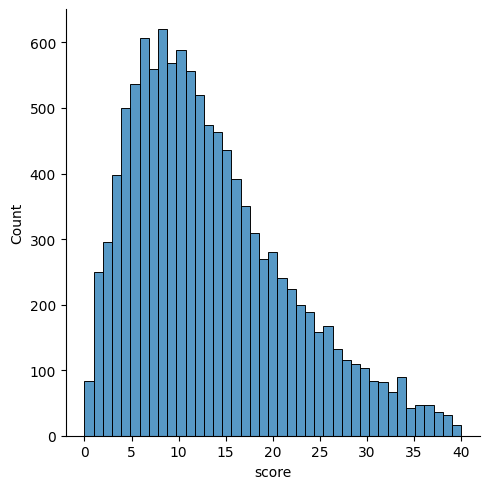

In [44]:
import seaborn as sns
sns.displot(df, x="score")
print('Как видно из графика, распределение баллов за тест напоминает нормальное распределение')

Рсапределение полов почти одинакавое


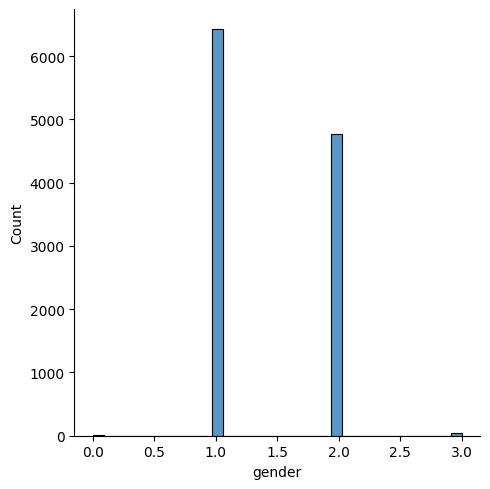

In [45]:
sns.displot(df, x="gender")
print('Рсапределение полов почти одинакавое')

Удаляем аномальные значения из столбца возраст, рассматриваем только людей младще 70 лет

{'whiskers': [<matplotlib.lines.Line2D at 0x1c652abd4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c652abda00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c652abd220>],
 'medians': [<matplotlib.lines.Line2D at 0x1c652abdf40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c652aca220>],
 'means': []}

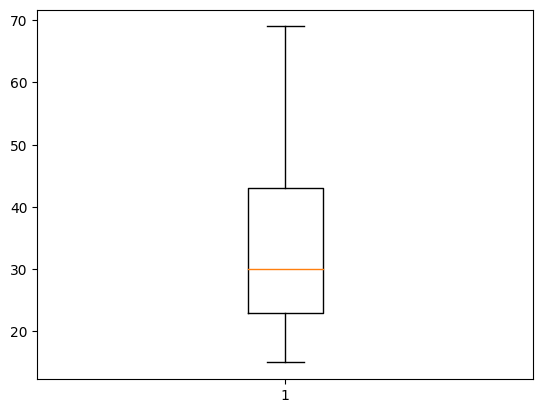

In [46]:
df = df[(df['age'] < 70) & (df['age'] > 14)]
plt.boxplot(df['age'])

Удаляем аномальные значения в столбце, который отвечает за время прохождения теста. Удаляем те анкеты, где время прохождения теста меньше 40 и больше 450 секунд.

{'whiskers': [<matplotlib.lines.Line2D at 0x1c652c67370>,
 'caps': [<matplotlib.lines.Line2D at 0x1c652c678b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c652c670d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c652c67df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c652af50d0>],
 'means': []}

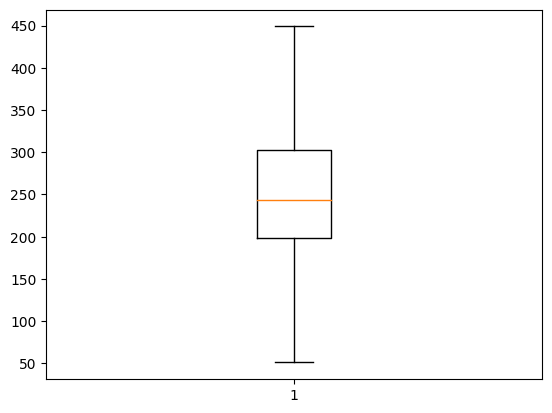

In [47]:
df = df[(df['elapse'] < 450) & (df['elapse'] > 40)]                   
plt.boxplot(df['elapse'])

# Разобьем столбец score на группы

In [48]:
df['score'] = df['score'].apply(lambda x: 0 if (x <= 5) else 1 if 5 < x <= 10 else 2 if 10 < x <= 15 else 3 if 15 < x <= 20 else 4 if 20 < x <= 25 else 5 if 25 < x <= 30 else 6 if 30 < x <= 35 else 7)
df

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
0,3,2,2,2,2,1,2,1,2,2,...,1,1,2,2,2,1,2,211,1,50
1,1,2,2,2,1,2,2,1,2,1,...,2,1,2,2,2,2,1,149,1,40
2,5,1,2,2,1,2,1,2,1,2,...,1,2,1,1,2,1,2,168,1,28
3,5,1,1,2,2,2,1,2,1,1,...,1,2,1,2,2,1,1,230,1,37
4,1,1,2,1,1,1,2,1,2,1,...,2,1,2,2,2,0,1,389,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11238,0,2,2,2,1,1,2,1,2,1,...,2,1,2,2,2,2,1,243,1,24
11239,1,2,2,1,1,1,2,1,1,1,...,2,1,2,1,2,2,1,197,1,39
11240,1,1,2,2,1,1,2,1,2,1,...,2,1,2,2,2,2,1,447,2,33
11241,2,2,2,1,1,1,1,1,1,1,...,1,2,2,2,2,2,1,167,1,24


# Проверим корреляционную зависимость

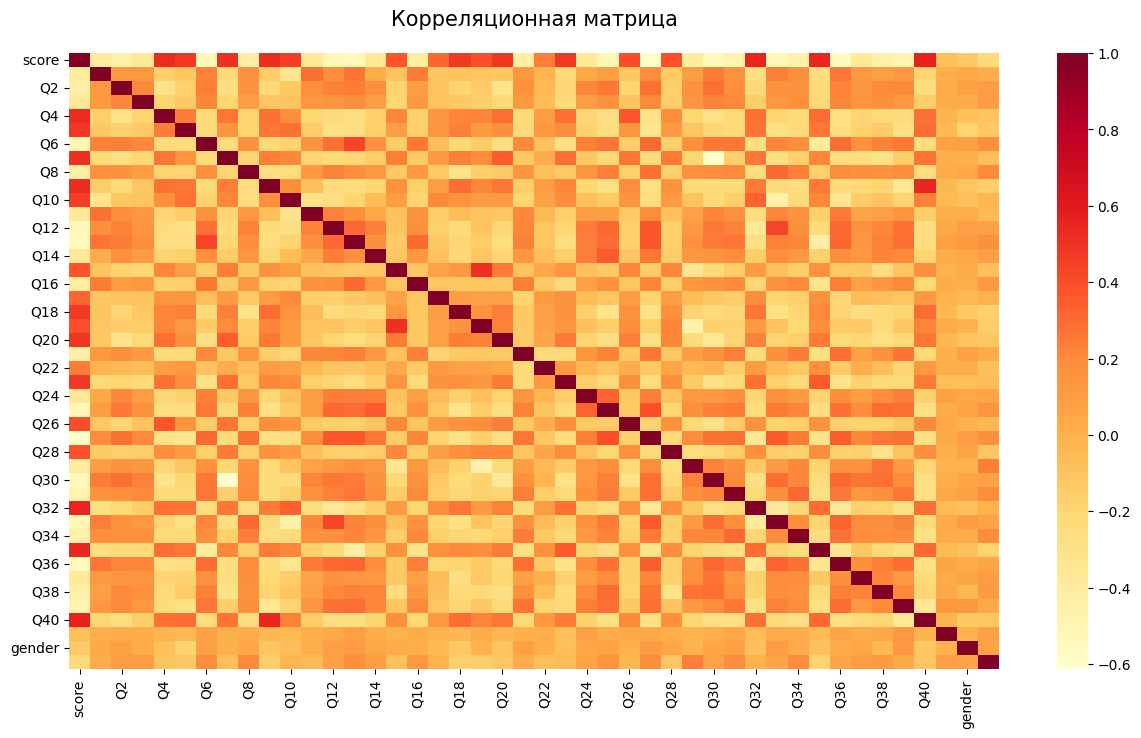

In [49]:
ax = sns.heatmap(df.corr(), cmap = "YlOrRd")
ax.set_title('Корреляционная матрица', fontdict={'fontsize':15}, pad=20) 
plt.gcf().set_size_inches(15, 8)

# Сравнение по некоторым параметрам

Зависимость результатов теста от пола

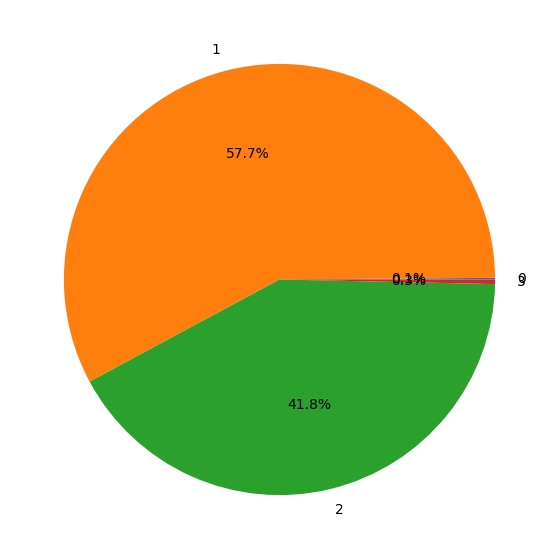

In [50]:
fig = plt.figure(figsize =(10, 7))
plt.pie([len(df[df['gender']==0]['gender']), len(df[df['gender']==1]['gender']), len(df[df['gender']==2]['gender']), len(df[df['gender']==3]['gender'])], autopct='%1.01f%%', labels = [0, 1, 2, 3])
plt.show()

In [51]:
df = df[(df['gender'] == 1) | (df['gender'] == 2) | (df['gender'] == 3)]
df

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
0,3,2,2,2,2,1,2,1,2,2,...,1,1,2,2,2,1,2,211,1,50
1,1,2,2,2,1,2,2,1,2,1,...,2,1,2,2,2,2,1,149,1,40
2,5,1,2,2,1,2,1,2,1,2,...,1,2,1,1,2,1,2,168,1,28
3,5,1,1,2,2,2,1,2,1,1,...,1,2,1,2,2,1,1,230,1,37
4,1,1,2,1,1,1,2,1,2,1,...,2,1,2,2,2,0,1,389,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11238,0,2,2,2,1,1,2,1,2,1,...,2,1,2,2,2,2,1,243,1,24
11239,1,2,2,1,1,1,2,1,1,1,...,2,1,2,1,2,2,1,197,1,39
11240,1,1,2,2,1,1,2,1,2,1,...,2,1,2,2,2,2,1,447,2,33
11241,2,2,2,1,1,1,1,1,1,1,...,1,2,2,2,2,2,1,167,1,24


<AxesSubplot: xlabel='gender', ylabel='score'>

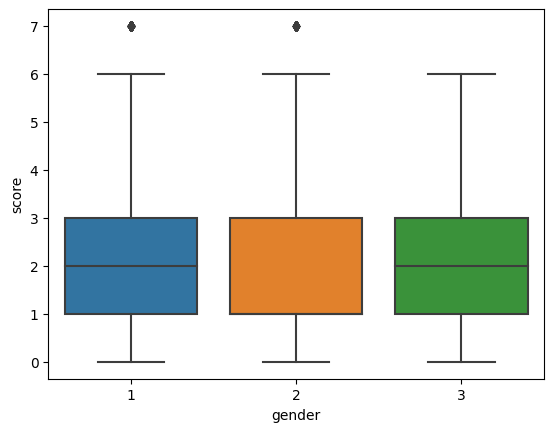

In [52]:
sns.boxplot(x='gender', y='score', data = df[['gender', 'score']])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c65353f580>,
 'caps': [<matplotlib.lines.Line2D at 0x1c65353f9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c65353f2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c65353fee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c65354e1c0>],
 'means': []}

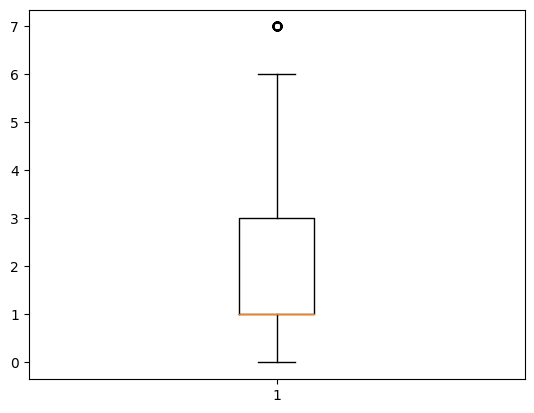

In [53]:
plt.boxplot(df[df['gender'] == 2]['score'])

Зависимость результатов теста от возраста

Для начала разделим возраст людей на группы, разделим на 6 групп

In [54]:
df['age'] = df['age'].apply(lambda x: 0 if (x <= 20) else 1 if 20 < x <= 30 else 2 if 30 < x <= 40 else 3 if 40 < x <= 50 else 4 if 50 < x <= 60 else 5)
df

C:\Users\Vlada\AppData\Local\Temp\ipykernel_8708\1482860832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].apply(lambda x: 0 if (x <= 20) else 1 if 20 < x <= 30 else 2 if 30 < x <= 40 else 3 if 40 < x <= 50 else 4 if 50 < x <= 60 else 5)


,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
0,3,2,2,2,2,1,2,1,2,2,...,1,1,2,2,2,1,2,211,1,3
1,1,2,2,2,1,2,2,1,2,1,...,2,1,2,2,2,2,1,149,1,2
2,5,1,2,2,1,2,1,2,1,2,...,1,2,1,1,2,1,2,168,1,1
3,5,1,1,2,2,2,1,2,1,1,...,1,2,1,2,2,1,1,230,1,2
4,1,1,2,1,1,1,2,1,2,1,...,2,1,2,2,2,0,1,389,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11238,0,2,2,2,1,1,2,1,2,1,...,2,1,2,2,2,2,1,243,1,1
11239,1,2,2,1,1,1,2,1,1,1,...,2,1,2,1,2,2,1,197,1,2
11240,1,1,2,2,1,1,2,1,2,1,...,2,1,2,2,2,2,1,447,2,2
11241,2,2,2,1,1,1,1,1,1,1,...,1,2,2,2,2,2,1,167,1,1


In [55]:
a = []
for i in range(6):
    a.append(len(df[df['age'] == i]))
a

[1527, 3356, 1988, 1502, 996, 380]

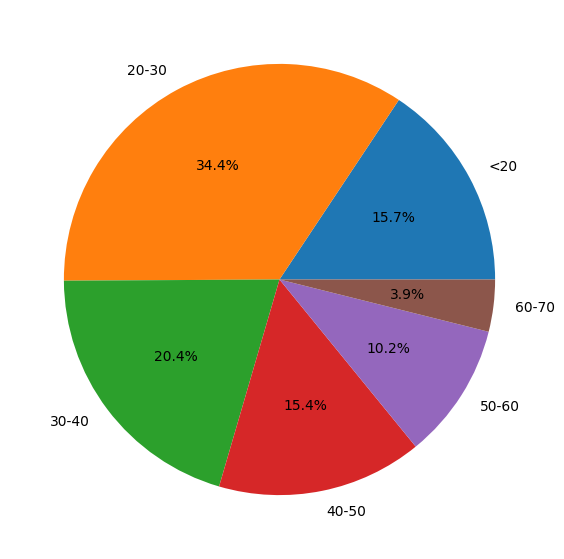

In [56]:
fig = plt.figure(figsize =(10, 7))
plt.pie(a, autopct='%1.01f%%', labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70'])
plt.show()

<AxesSubplot: xlabel='age', ylabel='score'>

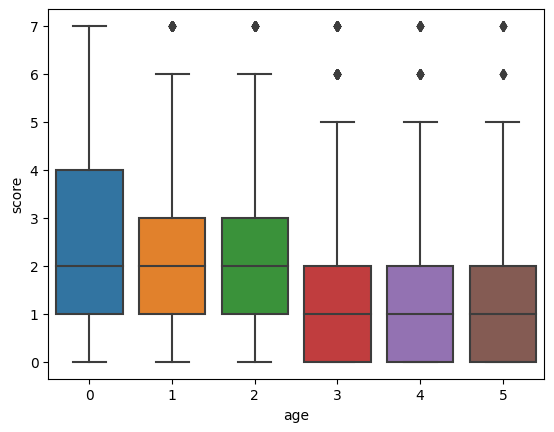

In [57]:
sns.boxplot(x='age', y='score', data = df[['score', 'age']])

In [58]:
dfl = df.groupby(['age', 'gender']).mean().sort_values(by='score', ascending=False)['score']
dfl

age  gender
0    3         3.111111
     1         2.701124
1    3         2.700000
     1         2.429799
0    2         2.418790
2    1         2.200000
1    2         2.031150
3    1         1.930318
2    2         1.740167
5    1         1.666667
4    1         1.589286
2    3         1.555556
4    3         1.500000
3    2         1.493392
     3         1.333333
4    2         1.114286
5    2         1.015707
Name: score, dtype: float64

In [60]:
dfl.to_csv('res.csv', index = False, sep = ';')

Вывод:
    1) самые подверженные расстройству - это люди пола 1 до 30 лет;
    2) самые нормальные - это люди пола 2 50-70 лет

# Построение модели

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
df = df.drop(columns=['elapse'])
df

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,gender,age
0,3,2,2,2,2,1,2,1,2,2,...,1,1,1,2,2,2,1,2,1,3
1,1,2,2,2,1,2,2,1,2,1,...,2,2,1,2,2,2,2,1,1,2
2,5,1,2,2,1,2,1,2,1,2,...,1,1,2,1,1,2,1,2,1,1
3,5,1,1,2,2,2,1,2,1,1,...,1,1,2,1,2,2,1,1,1,2
4,1,1,2,1,1,1,2,1,2,1,...,2,2,1,2,2,2,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11238,0,2,2,2,1,1,2,1,2,1,...,2,2,1,2,2,2,2,1,1,1
11239,1,2,2,1,1,1,2,1,1,1,...,2,2,1,2,1,2,2,1,1,2
11240,1,1,2,2,1,1,2,1,2,1,...,2,2,1,2,2,2,2,1,2,2
11241,2,2,2,1,1,1,1,1,1,1,...,1,1,2,2,2,2,2,1,1,1


In [63]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df['score'], 
                                                    test_size=0.2,
                                                    random_state=True)

# KNeighborsClassifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
cls = KNeighborsClassifier(n_neighbors=11)

In [65]:
cls.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [66]:
y_pred = cls.predict(x_test)

Accuracy - 0.4723076923076923
Precision - 0.475689606110781
Recall - 0.4723076923076923
f1_score - 0.443164834861164


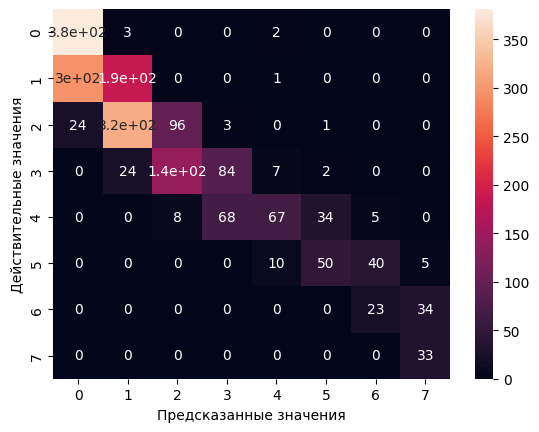

In [67]:
from sklearn import metrics
class_names = list(df['score'].unique())
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(class_names)
plt.yticks(class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
print(f"Accuracy - {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision - {metrics.precision_score(y_test, y_pred, average = 'weighted')}")
print(f"Recall - {metrics.recall_score(y_test, y_pred, average = 'weighted')}")
print(f"f1_score - {metrics.f1_score(y_test, y_pred, average = 'weighted')}")

C:\Users\Vlada\AppData\Local\Temp\ipykernel_8708\4081122730.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = y_train[:int(i)]
C:\Users\Vlada\AppData\Local\Temp\ipykernel_8708\4081122730.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = y_train[:int(i)]
C:\Users\Vlada\AppData\Local\Temp\ipykernel_8708\4081122730.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* index

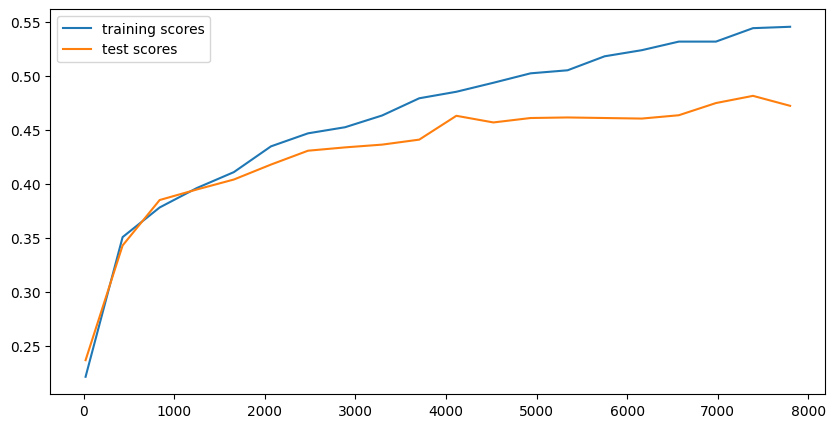

In [68]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(x_train), 20):
    clf = KNeighborsClassifier(n_neighbors=11)
    X = x_train.iloc[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    numbers.append(int(i))
    training_scores.append(clf.score(x_train, y_train))
    test_scores.append(clf.score(x_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

# Логистическая регрессия

In [72]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(max_iter=150)
cls.fit(x_train, y_train)

C:\Users\Vlada\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=150)

In [73]:
y_pred = cls.predict(x_test)

Accuracy - 0.8912820512820513
Precision - 0.8927096080941276
Recall - 0.8912820512820513
f1_score - 0.8914544108431441


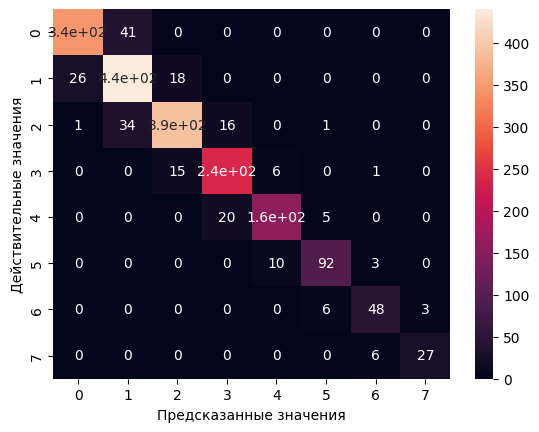

In [74]:
from sklearn import metrics
class_names = list(df['score'].unique())
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(class_names)
plt.yticks(class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
print(f"Accuracy - {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision - {metrics.precision_score(y_test, y_pred, average = 'weighted')}")
print(f"Recall - {metrics.recall_score(y_test, y_pred, average = 'weighted')}")
print(f"f1_score - {metrics.f1_score(y_test, y_pred, average = 'weighted')}")

C:\Users\Vlada\AppData\Local\Temp\ipykernel_8708\352398882.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = y_train[:int(i)]
C:\Users\Vlada\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vlada\AppData\Local\Temp\ipykernel_8708\352398882.py:8: FutureWarning: The behavior of 

C:\Users\Vlada\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vlada\AppData\Local\Temp\ipykernel_8708\352398882.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = y_train[:int(i)]
C:\Users\Vlada\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWar

C:\Users\Vlada\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


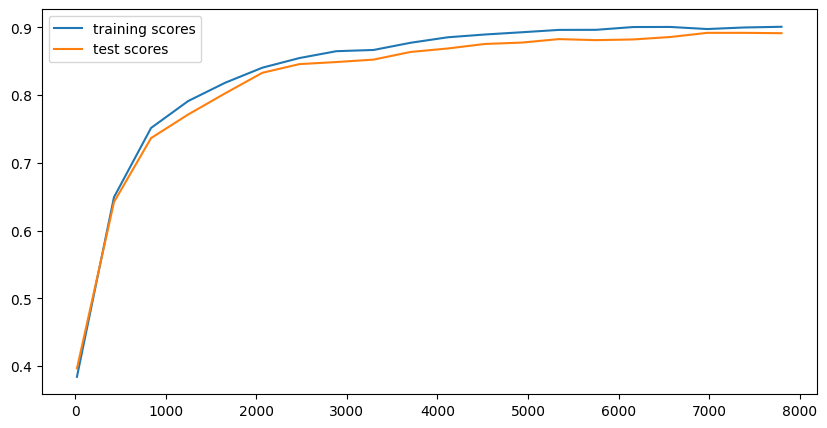

In [75]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(x_train), 20):
    clf = LogisticRegression(max_iter=150)
    X = x_train.iloc[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    numbers.append(int(i))
    training_scores.append(clf.score(x_train, y_train))
    test_scores.append(clf.score(x_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

# Метод опорных векторов c линейным ядром

In [76]:
from sklearn import svm
cls = svm.SVC(kernel='linear')

In [77]:
cls.fit(x_train, y_train)

SVC(kernel='linear')

In [78]:
y_pred = cls.predict(x_test)

Accuracy - 0.9676923076923077
Precision - 0.9681330661094918
Recall - 0.9676923076923077
f1_score - 0.9678134224871586


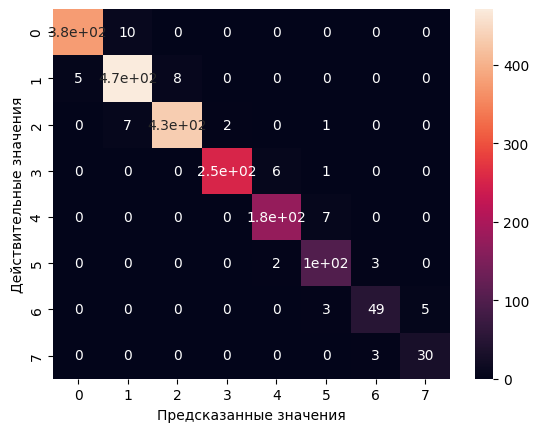

In [79]:
from sklearn import metrics
class_names = list(df['score'].unique())
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(class_names)
plt.yticks(class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
print(f"Accuracy - {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision - {metrics.precision_score(y_test, y_pred, average = 'weighted')}")
print(f"Recall - {metrics.recall_score(y_test, y_pred, average = 'weighted')}")
print(f"f1_score - {metrics.f1_score(y_test, y_pred, average = 'weighted')}")

C:\Users\Vlada\AppData\Local\Temp\ipykernel_8708\1343792938.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = y_train[:int(i)]
C:\Users\Vlada\AppData\Local\Temp\ipykernel_8708\1343792938.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = y_train[:int(i)]
C:\Users\Vlada\AppData\Local\Temp\ipykernel_8708\1343792938.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* index

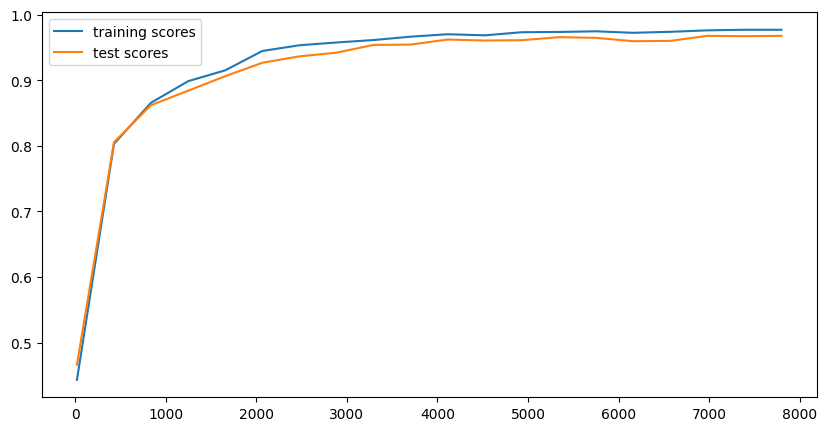

In [80]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(x_train), 20):
    clf = svm.SVC(kernel='linear')
    X = x_train.iloc[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    numbers.append(int(i))
    training_scores.append(clf.score(x_train, y_train))
    test_scores.append(clf.score(x_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

# Метод опорных векторов c полиномиальным ядром

In [81]:
from sklearn import svm
cls = svm.SVC(kernel='poly')

In [82]:
cls.fit(x_train, y_train)

SVC(kernel='poly')

In [83]:
y_pred = cls.predict(x_test)

Accuracy - 0.938974358974359
Precision - 0.9392994701286013
Recall - 0.938974358974359
f1_score - 0.9390038152046761


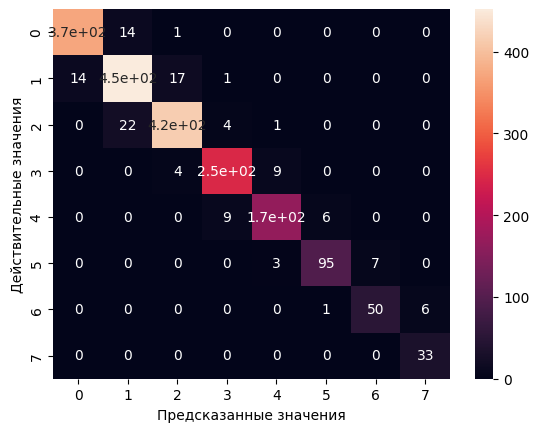

In [84]:
from sklearn import metrics
class_names = list(df['score'].unique())
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(class_names)
plt.yticks(class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
print(f"Accuracy - {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision - {metrics.precision_score(y_test, y_pred, average = 'weighted')}")
print(f"Recall - {metrics.recall_score(y_test, y_pred, average = 'weighted')}")
print(f"f1_score - {metrics.f1_score(y_test, y_pred, average = 'weighted')}")

C:\Users\Vlada\AppData\Local\Temp\ipykernel_8708\3333845494.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = y_train[:int(i)]
C:\Users\Vlada\AppData\Local\Temp\ipykernel_8708\3333845494.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = y_train[:int(i)]
C:\Users\Vlada\AppData\Local\Temp\ipykernel_8708\3333845494.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* index

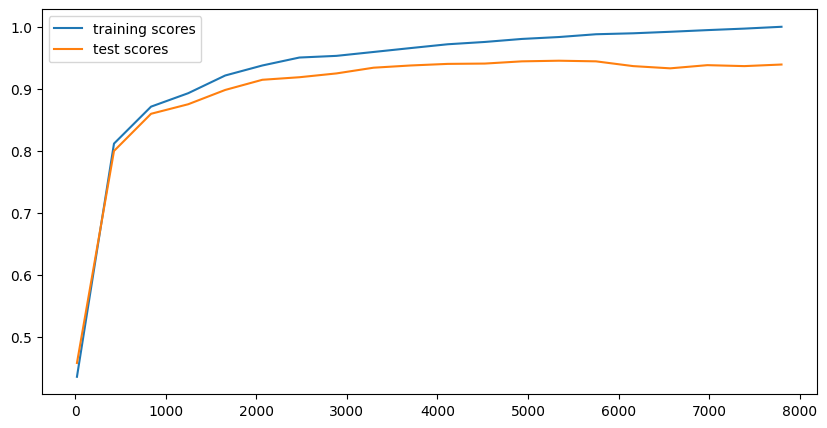

In [85]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(x_train), 20):
    clf = svm.SVC(kernel='poly')
    X = x_train.iloc[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    numbers.append(int(i))
    training_scores.append(clf.score(x_train, y_train))
    test_scores.append(clf.score(x_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

# Метод опорных векторов с гауссовым ядром (SVC)

In [86]:
from sklearn import svm
cls = svm.SVC(kernel='rbf')

In [87]:
cls.fit(x_train, y_train)

SVC()

In [88]:
y_pred = cls.predict(x_test)

Accuracy - 0.9241025641025641
Precision - 0.9251660986950836
Recall - 0.9241025641025641
f1_score - 0.9241563749263628


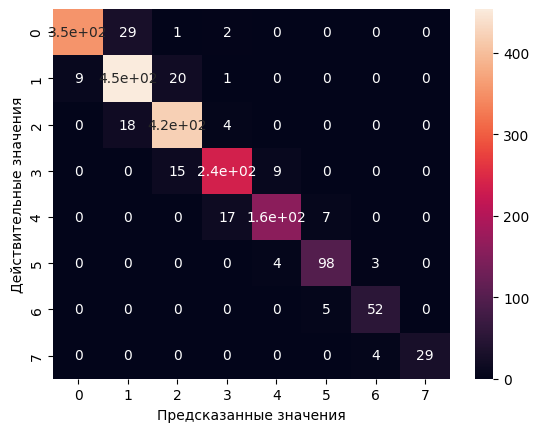

In [89]:
from sklearn import metrics
class_names = list(df['score'].unique())
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(class_names)
plt.yticks(class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
print(f"Accuracy - {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision - {metrics.precision_score(y_test, y_pred, average = 'weighted')}")
print(f"Recall - {metrics.recall_score(y_test, y_pred, average = 'weighted')}")
print(f"f1_score - {metrics.f1_score(y_test, y_pred, average = 'weighted')}")

C:\Users\Vlada\AppData\Local\Temp\ipykernel_8708\586600110.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = y_train[:int(i)]
C:\Users\Vlada\AppData\Local\Temp\ipykernel_8708\586600110.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = y_train[:int(i)]
C:\Users\Vlada\AppData\Local\Temp\ipykernel_8708\586600110.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing

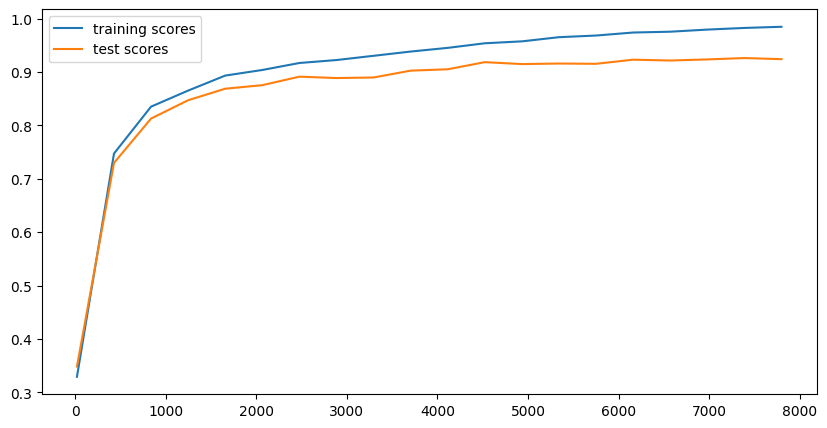

In [90]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(x_train), 20):
    clf = svm.SVC(kernel='rbf')
    X = x_train.iloc[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    numbers.append(int(i))
    training_scores.append(clf.score(x_train, y_train))
    test_scores.append(clf.score(x_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")

# Многослойный перцептрон (MLP)

In [91]:
from sklearn.neural_network import MLPClassifier
cls = MLPClassifier(alpha=1)

In [92]:
cls.fit(x_train, y_train)

MLPClassifier(alpha=1)

In [93]:
y_pred = cls.predict(x_test)

Accuracy - 0.9112820512820513
Precision - 0.914674143928291
Recall - 0.9112820512820513
f1_score - 0.9114586846887094


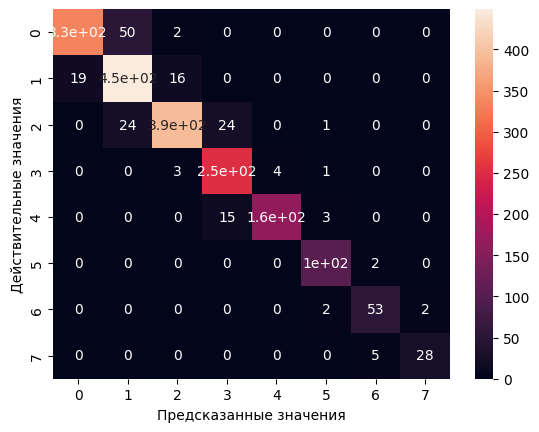

In [94]:
from sklearn import metrics
class_names = list(df['score'].unique())
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(class_names)
plt.yticks(class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
print(f"Accuracy - {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision - {metrics.precision_score(y_test, y_pred, average = 'weighted')}")
print(f"Recall - {metrics.recall_score(y_test, y_pred, average = 'weighted')}")
print(f"f1_score - {metrics.f1_score(y_test, y_pred, average = 'weighted')}")

C:\Users\Vlada\AppData\Local\Temp\ipykernel_8708\1347041826.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = y_train[:int(i)]
C:\Users\Vlada\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Vlada\AppData\Local\Temp\ipykernel_8708\1347041826.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = y_t

C:\Users\Vlada\AppData\Local\Temp\ipykernel_8708\1347041826.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = y_train[:int(i)]
C:\Users\Vlada\AppData\Local\Temp\ipykernel_8708\1347041826.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = y_train[:int(i)]
C:\Users\Vlada\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  w

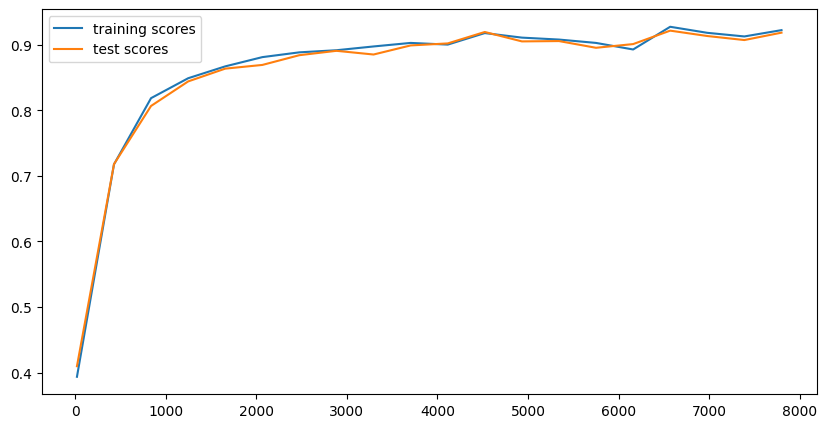

In [95]:
training_scores = []
test_scores = []
numbers = []

for i in np.linspace(20, len(x_train), 20):
    clf = MLPClassifier(alpha=1)
    X = x_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    numbers.append(int(i))
    training_scores.append(clf.score(x_train, y_train))
    test_scores.append(clf.score(x_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
plt.legend(loc="best")